In [21]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
#sns.set()

## Spherically averaged 3D power spectrum: EoR + noise + FG, 1000 hours

In [3]:
#Spherically averaged 3D power spectrum
#EoR + noise + FG, 1000 hours
#Read results from individual submitted results 

#Datasets
datasets = ['truth', 'team1', 'team2', 'team3', 'team4', 'team5', 'team6']
#Colors to use for plotting different datasets
plt_colors = ['k','r','y','g','b','m','c']

#Plots directory
plots_directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/plots'

#Observation time in hours
obsv_time = 1000

In [4]:
#Truth
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/truth/'

#FG
file_name = 'ps3d_GalFG_standard_eor0_u50-250.txt'
filename = directory+file_name
df_fg = pd.read_csv(filename,skiprows=3,delim_whitespace=True,usecols=[4,5],names=[('FG','d2'),('FG','d2_sv')])

#EoR
file_name = 'ps3d_eor_standard_eor0_u50-250.txt'
filename = directory+file_name
df_eor = pd.read_csv(filename,skiprows=3,delim_whitespace=True,usecols=[2,4,5],names=[('k',''),('EoR','d2'),('EoR','d2_sv')])

#Compute error in EoR as d2 = sample variance of EoR signal. Noise is 0.
df_eor['EoR', 'd2_total_error'] =  df_eor['EoR','d2_sv']

#Concatenate the values of EoR, noise, FG into one dataframe
df_list = [df_eor, df_fg]
df = pd.concat(df_list,axis=1,join='inner')
df_truth = df.assign(dataset='truth')

In [5]:
#Team 1
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/team1/results/eor_p_noise_p_fg/'

#Noise
file_name = 'ps3d_noise_1000h.txt'
filename = directory+file_name
df_noise = pd.read_csv(filename,skiprows=3,delim_whitespace=True,usecols=[1,2],names=[('Noise','d2'),('Noise','d2_sv')])

#FG
file_name = 'ps3d_rec_fg_1000h.txt'
filename = directory+file_name
df_fg = pd.read_csv(filename,skiprows=3,delim_whitespace=True,usecols=[1,2],names=[('FG','d2'),('FG','d2_sv')])

#EoR
file_name = 'ps3d_rec_eor_1000h.txt'
filename = directory+file_name
df_eor = pd.read_csv(filename,skiprows=3,delim_whitespace=True,names=[('k',''),('EoR','d2'),('EoR','d2_sv')])

#Compute error in EoR as d2 = sample variance of EoR signal + Noise
df_eor['EoR', 'd2_total_error'] =  df_eor['EoR','d2_sv'] + df_noise['Noise','d2']

#Concatenate the values of EoR, noise, FG into one dataframe
df_list = [df_eor, df_noise, df_fg]
df = pd.concat(df_list,axis=1,join='inner')
df_team1 = df.assign(dataset='team1')

In [6]:
#Team 2
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/team2/ska_data_challenge/'

#EoR
file_name = '1000h_eor_p_fg_p_noise_1d.txt'
filename = directory+file_name
df = pd.read_csv(filename,skiprows=1,nrows=9,delim_whitespace=True,
                       names=[('k',''),('FG','d2'), ('EoR','d2'),('Noise','d2'),('Noise','d2_sv'),('EoR','d2_sv')])

#Compute error in EoR as d2 = sample variance of EoR signal + Noise
df['EoR', 'd2_total_error'] =  df['EoR','d2_sv'] + df['Noise','d2']

#Concatenate the values of EoR, noise, FG into one dataframe
df_team2 = df.assign(dataset='team2')

In [7]:
#Team 3
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/team34/results_new/image/eor_p_noise_p_fg_1000/'

#Noise
file_name = 'noise_3d.txt'
filename = directory+file_name
df_noise = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[1,2],names=[('Noise','d2'),('Noise','d2_sv')])

#FG
file_name = 'fg_3d.txt'
filename = directory+file_name
df_fg = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[1,2],names=[('FG','d2'),('FG','d2_sv')])

#EoR
file_name = 'eor_3d.txt'
filename = directory+file_name
df_eor = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[0,1,2],names=[('k',''),('EoR','d2'),('EoR','d2_sv')])

#Compute error in EoR as d2 = sample variance of EoR signal + Noise
df_eor['EoR', 'd2_total_error'] =  df_eor['EoR','d2_sv'] + df_noise['Noise','d2']

#Concatenate the values of EoR, noise, FG into one dataframe
df_list = [df_eor, df_noise, df_fg]
df = pd.concat(df_list,axis=1,join='inner')
df_team3 = df.assign(dataset='team3')

In [8]:
#Team 4
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/team34/results_new/vis2image/eor_p_noise_p_fg_1000/'

#Noise
file_name = 'noise_3d.txt'
filename = directory+file_name
df_noise = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[1,2],names=[('Noise','d2'),('Noise','d2_sv')])

#FG
file_name = 'fg_3d.txt'
filename = directory+file_name
df_fg = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[1,2],names=[('FG','d2'),('FG','d2_sv')])

#EoR
file_name = 'eor_3d.txt'
filename = directory+file_name
df_eor = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[0,1,2],names=[('k',''),('EoR','d2'),('EoR','d2_sv')])

#Compute error in EoR as d2 = sample variance of EoR signal + Noise
df_eor['EoR', 'd2_total_error'] =  df_eor['EoR','d2_sv'] + df_noise['Noise','d2']

#Concatenate the values of EoR, noise, FG into one dataframe
df_list = [df_eor, df_noise, df_fg]
df = pd.concat(df_list,axis=1,join='inner')
df_team4 = df.assign(dataset='team4')

In [9]:
#Team 5
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/team5/SKA_data_challenge/eor_p_noise_p_fg/'

#EoR
file_name = 'ave1d_wei1_win1_eor_p_noise_p_fg_t_obsv_1000.0_hr.dat'
filename = directory+file_name

df_eor = pd.read_csv(filename,delim_whitespace=True,usecols=[0,1,2],names=[('k',''),('EoR','d2'),('EoR','d2_sv')])

#95% solution interval corresponds to 2*sigma, so divide by 2 to get sample variance (=sigma)
df_eor['EoR','d2_sv'] = df_eor['EoR','d2_sv']/2

#Compute error in EoR as d2 = sample variance of EoR signal (no noise values provided)
df_eor['EoR', 'd2_total_error'] = df_eor['EoR','d2_sv']
df = df_eor

#Create final dataframe
df_team5 = df.assign(dataset='team5')

In [10]:
#Team 6
directory = '/home/modhurita/Work/SKA_blind_challenge_results_anonymized/team6/Archive/'

#Noise
file_name = 'noise_1000hrs_3d.txt'
filename = directory+file_name
df_noise = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[1,2],names=[('Noise','d2'),('Noise','d2_sv')])

#FG
file_name = 'eor_p_noise_p_fg_1000hrs_fg_3d.txt'
filename = directory+file_name
df_fg = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[1,2],names=[('FG','d2'),('FG','d2_sv')])

#EoR
file_name = 'eor_p_noise_p_fg_1000hrs_eor_3d.txt'
filename = directory+file_name
df_eor = pd.read_csv(filename,skiprows=1,delim_whitespace=True,usecols=[0,1,2],names=[('k',''),('EoR','d2'),('EoR','d2_sv')])

#Compute error in EoR as d2 = sample variance of EoR signal + Noise
df_eor['EoR', 'd2_total_error'] =  df_eor['EoR','d2_sv'] + df_noise['Noise','d2']

#Concatenate the values of EoR, noise, FG into one dataframe
df_list = [df_eor, df_noise, df_fg]
df = pd.concat(df_list,axis=1,join='inner')

#Create final dataframe
df_team6 = df.assign(dataset='team6')

In [11]:
#Concatenate results from different groups into a single dataframe
df = pd.concat([df_truth, df_team1, df_team2, df_team3, df_team4, df_team5, df_team6])

#Replace NaNs with empty cells
df = df.fillna('')

#Reorder columns
cols = [('dataset',''),('k',''),('EoR','d2'),('EoR','d2_sv'),('EoR', 'd2_total_error'),('Noise','d2'),('Noise','d2_sv'),('FG','d2'),('FG','d2_sv')]
df = df[cols]

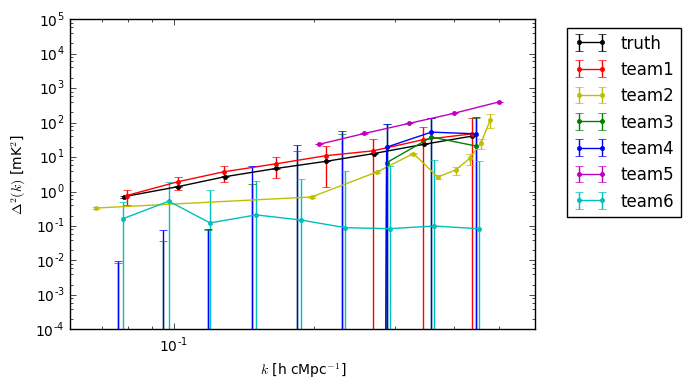

In [12]:
#Plot raw results

plt.hold('on')
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.06,0.6])

for i in range(len(datasets)):
    dataset=datasets[i]
    plt_color=plt_colors[i]
    k=df.loc[df['dataset']==dataset]['k'].values
    d2=df.loc[df['dataset']==dataset][('EoR','d2')].values
    d2_err=df.loc[df['dataset']==dataset][('EoR','d2_total_error')].values
    plt.errorbar(x=k,y=d2,yerr=d2_err,marker='.',mfc=plt_color,mec=plt_color,color=plt_color,linestyle='-',label=dataset)
plt.xlabel('$k$ [h cMpc$^{-1}$]')
plt.ylabel('$\Delta^2 (k)$ [mK$^2$]')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.ylim(1e-4,1e5)
plt.savefig('%s/eor_noise_fg_%sh_results.jpg'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.savefig('%s/eor_noise_fg_%sh_results.eps'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.show()
plt.hold('off')

**Figure 1**: *Spherically-averaged 3D power spectrum: Submitted results*

In [13]:
from scipy.interpolate import interp1d

dataset='truth'    
k_truth=df.loc[df['dataset']==dataset]['k'].values
d2_truth=df.loc[df['dataset']==dataset][('EoR','d2')].values
f = interp1d(k_truth,d2_truth,fill_value='extrapolate')

df['d2_EoR_interp']=''

for i in range(1,len(datasets)):
    dataset=datasets[i]
    k=df.loc[df['dataset']==dataset]['k'].values
    df.loc[df['dataset']==dataset,'d2_EoR_interp'] = f(k)
    

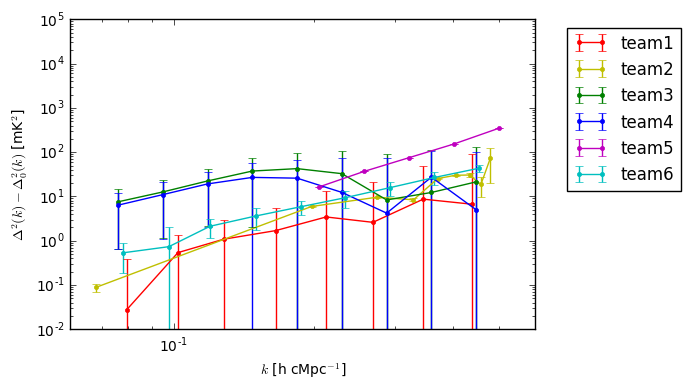

In [14]:
#Plot difference in d2_EoR, |calculated-truth|

plt.hold('on')
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.06,0.6])

for i in range(1,len(datasets)):
    
    dataset=datasets[i]
    plt_color=plt_colors[i]
    
    k=df.loc[df['dataset']==dataset]['k'].values
    
    d2_recovered = df.loc[df['dataset']==dataset][('EoR','d2')].values 
    d2_interpolated = df.loc[df['dataset']==dataset]['d2_EoR_interp'].values
    d2_diff = d2_recovered - d2_interpolated
    d2_diff = np.abs(d2_diff)
    
    d2_err=df.loc[df['dataset']==dataset][('EoR','d2_total_error')].values
    
    plt.errorbar(x=k,y=d2_diff,yerr=d2_err,marker='.',mfc=plt_color,mec=plt_color,color=plt_color,linestyle='-',label=dataset)

plt.xlabel('$k$ [h cMpc$^{-1}$]')
plt.ylabel('$\Delta^2 (k) - \Delta^2_0 (k)$ [mK$^2$]')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.ylim(1e-2,1e5)
plt.savefig('%s/eor_noise_fg_%sh_difference.jpg'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.savefig('%s/eor_noise_fg_%sh_difference.eps'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.show()
plt.hold('off')

**Figure 2**: *Spherically-averaged 3D power spectrum: Difference between submitted results and truth* 

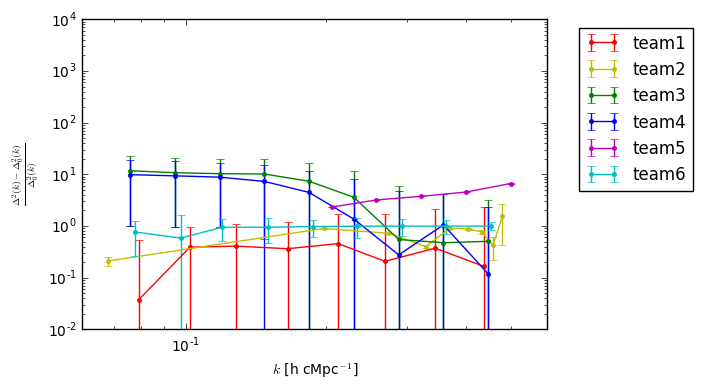

In [15]:
#Plot fractional difference in d2_EoR, |calculated-truth|/truth

plt.hold('on')
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.06,0.6])

for i in range(1,len(datasets)):
    
    dataset=datasets[i]
    plt_color=plt_colors[i]
    
    k=df.loc[df['dataset']==dataset]['k'].values
    
    d2_recovered = df.loc[df['dataset']==dataset][('EoR','d2')].values 
    d2_interpolated = df.loc[df['dataset']==dataset]['d2_EoR_interp'].values
    d2_diff = d2_recovered - d2_interpolated
    d2_diff = np.abs(d2_diff)
    d2_diff_ratio = d2_diff/d2_interpolated
        
    d2_err=df.loc[df['dataset']==dataset][('EoR','d2_total_error')].values
    d2_diff_err = d2_err/d2_interpolated

    plt.errorbar(x=k,y=d2_diff_ratio,yerr=d2_diff_err,marker='.',mfc=plt_color,mec=plt_color,color=plt_color,linestyle='-',label=dataset)

plt.xlabel('$k$ [h cMpc$^{-1}$]')
plt.ylabel('$\\frac{\Delta^2 (k) - \Delta^2_0 (k)}{\Delta^2_0 (k)}$')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.ylim(1e-2,1e4)
plt.savefig('%s/eor_noise_fg_%sh_fractional_difference.jpg'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.savefig('%s/eor_noise_fg_%sh_fractional_difference.eps'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.show()
plt.hold('off')

**Figure 3**: *Spherically-averaged 3D power spectrum: Fractional difference between submitted results and truth* 

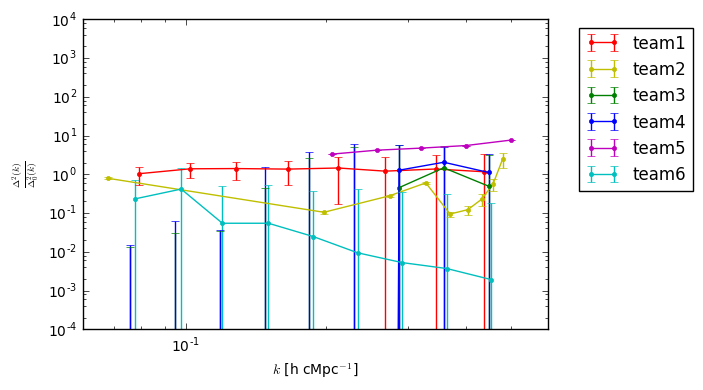

In [16]:
#Plot ratio of d2_EoR, calculated/truth

plt.hold('on')
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.06,0.6])

for i in range(1,len(datasets)):
    
    dataset=datasets[i]
    plt_color=plt_colors[i]
    
    k=df.loc[df['dataset']==dataset]['k'].values
    
    d2_recovered = df.loc[df['dataset']==dataset][('EoR','d2')].values 
    d2_interpolated = df.loc[df['dataset']==dataset]['d2_EoR_interp'].values
    d2_ratio = d2_recovered/d2_interpolated
        
    d2_err=df.loc[df['dataset']==dataset][('EoR','d2_total_error')].values
    d2_ratio_err = d2_err/d2_interpolated
    
    plt.errorbar(x=k,y=d2_ratio,yerr=d2_ratio_err,marker='.',mfc=plt_color,mec=plt_color,color=plt_color,linestyle='-',label=dataset)

plt.xlabel('$k$ [h cMpc$^{-1}$]')
plt.ylabel('$\\frac{\Delta^2 (k)}{\Delta^2_0 (k)}$')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.ylim(1e-4,1e4)
plt.savefig('%s/eor_noise_fg_%sh_ratio.jpg'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.savefig('%s/eor_noise_fg_%sh_ratio.eps'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.show()
plt.hold('off')

**Figure 4**: *Spherically-averaged 3D power spectrum: Ratio between submitted results and truth*

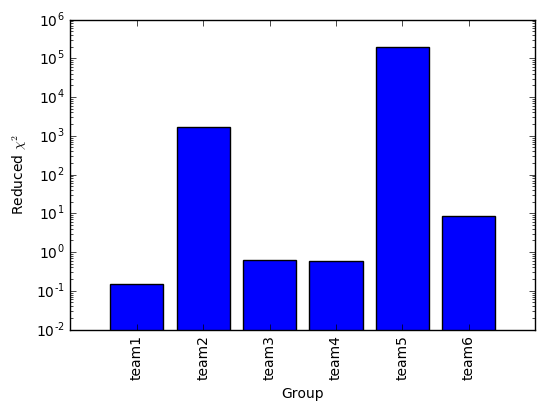

In [27]:
#Compute reduced chi-squared statistic

#Reduced chi squared
reduced_chi_squared = []

for dataset in datasets[1:]:
    
    #Estimated d2
    d2 = df.loc[df['dataset']==dataset][('EoR','d2')].values
    d2_error = df.loc[df['dataset']==dataset][('EoR','d2_total_error')].values
    
    #Truth d2
    d2_truth_interp = df.loc[df['dataset']==dataset]['d2_EoR_interp'].values
    
    #Degrees of freedom
    k = df.loc[df['dataset']==dataset]['k'].values
    dof = len(k)
    
    #Chi squared
    chi_sq = np.sum(np.square((d2 - d2_truth_interp)/d2_error))
    #Reduced chi squared
    red_chi_sq = chi_sq/dof
    reduced_chi_squared.append(red_chi_sq)

group_position = np.arange(len(datasets)-1)

plt.bar(group_position,reduced_chi_squared,align='center')
plt.xlabel('Group')
plt.ylabel('Reduced $\chi^2$')
plt.xticks(group_position,datasets[1:],rotation='vertical')
plt.yscale('log')
plt.ylim(0.01,1e6)
plt.savefig('%s/eor_noise_fg_%sh_reduced_chi_squared.jpg'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.savefig('%s/eor_noise_fg_%sh_reduced_chi_squared.eps'%(plots_directory,obsv_time),dpi=300,bbox_inches='tight')
plt.show()
plt.hold('off')

**Figure 5**: *Spherically-averaged 3D power spectrum: Reduced $\chi^2$*

## Data

In [18]:
df

dataset         k         EoR                                 Noise  \
                             d2      d2_sv d2_total_error          d2   
0   truth  0.078191    0.707663   0.038606       0.038606               
1   truth  0.102277    1.388641   0.054891       0.054891               
2   truth  0.128910    2.693308   0.064493       0.064493               
3   truth  0.166406    4.695167   0.073869       0.073869               
4   truth  0.213261    7.575028   0.080531       0.080531               
5   truth  0.269250   12.660327   0.118804       0.118804               
6   truth  0.345270   23.499304   0.221141       0.221141               
7   truth  0.437833   40.531657   0.352943       0.352943               
0   team1  0.079300    0.766700   0.156100       0.368800      0.2127   
1   team1  0.102200    1.925900   0.277000       0.797600      0.5206   
2   team1  0.128200    3.742200   0.340000       1.822300      1.4823   
3   team1  0.165700    6.350200   0.411200       3.875100      3.4639   
4   team1  0.212900   10.997600   0.633700       9.682200      9.0485   
5   team1  0.268400   15.188400   1.078500      19.166900     18.0884   
6   team1  0.344300   32.058800   2.113800      40.292100     38.1783   
7   team1  0.437700   47.204300   4.058000      85.940000      81.882   
0   team2  0.068000    0.331491   0.015908       0.017264  0.00135639   
1   team2  0.198045    0.696618   0.025613       0.066139   0.0405255   
2   team2  0.274116    3.726342   0.127033       0.231698    0.104665   
3   team2  0.328090   12.652810   0.435465       0.612344    0.176879   
4   team2  0.369955    2.649974   0.112633       0.399054    0.286421   
5   team2  0.404161    4.215094   0.231203       1.111238    0.880034   
6   team2  0.433082    9.150199   0.575738       3.154200     2.57846   
7   team2  0.458135   25.637715   1.678545       8.829638     7.15109   
8   team2  0.480233  122.252150  11.953874      53.390383     41.4365   
0   team3  0.075971   -6.924763   0.008182       6.933294     6.92511   
1   team3  0.094824  -11.470288   0.021548      11.506087     11.4845   
2   team3  0.118357  -20.235126   0.049422      20.309847     20.2604   
3   team3  0.147729  -33.807451   0.057108      35.441097      35.384   
4   team3  0.184391  -36.720272   0.198086      51.673062      51.475   
5   team3  0.230151  -23.617655   0.694339      70.876212     70.1819   
6   team3  0.287267    6.882214   0.654237      82.403440     81.7492   
7   team3  0.358558   38.253894   1.379915      97.524873      96.145   
8   team3  0.447541   20.951647   0.707193     112.799017     112.092   
0   team4  0.075971   -5.715237   0.009440       5.725088     5.71565   
1   team4  0.094824   -9.824552   0.053013       9.899067     9.84605   
2   team4  0.118357  -17.027574   0.058956      17.108192     17.0492   
3   team4  0.147729  -23.262806   0.117976      28.939039     28.8211   
4   team4  0.184391  -20.096176   0.358678      42.172803     41.8141   
5   team4  0.230151   -3.254975   0.717717      60.018050     59.3003   
6   team4  0.287267   19.434752   0.804274      69.409492     68.6052   
7   team4  0.358558   53.164002   1.049194      81.870118     80.8209   
8   team4  0.447541   47.323649   0.764245      93.889065     93.1248   
0   team5  0.206004   23.670609   0.054504       0.054504               
1   team5  0.257128   48.473229   0.081664       0.081664               
2   team5  0.320939   95.136737   0.136672       0.136672               
3   team5  0.400587  186.354777   0.265836       0.265836               
4   team5  0.500000  396.997674   1.712001       1.712001               
0   team6  0.077696    0.161200   0.324580       0.347571    0.022991   
1   team6  0.097703    0.524350   1.219400       1.330460     0.11106   
2   team6  0.119800    0.122740   0.907200       0.971027    0.063827   
3   team6  0.150520    0.210070   1.693100       1.843130     0.15003   
4   team6  0.187970    0.148870   1.871900       2.136250   